### Predicting Health Insurance Premiums (based on customer charges). 


We are using a dataset that contains information about potential health insurance customers such as age, smoking history and bmi. We will use the 'cost' column to predict how much a potential customer may spend on health care needs. This spending trend could be used by health insurance companies to determine what an appropriate health insurance premium should be. 

In [58]:
#Import dependencies
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
import plotly.express as px
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier


In [3]:
#Load csv file into Pandas DataFrame
h_data = pd.read_csv("Resource/Health_insurance.csv")

#View DataFrame
h_data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [4]:
#Check if DataFrame contains any null values
h_data.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [5]:
#Check DataFrame info
h_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [6]:
h_data["sex"].value_counts()

male      676
female    662
Name: sex, dtype: int64

In [7]:
h_data["smoker"].value_counts()

no     1064
yes     274
Name: smoker, dtype: int64

In [8]:
#Create some basic visuals using plotly.express to view some of the data
smoker_by_sex_chart = px.histogram(h_data, x = "smoker", color = "sex", title = "Number of Smokers")
smoker_by_sex_chart.show()

In [9]:
#Finding values of age column
h_data["age"].value_counts()

18    69
19    68
50    29
51    29
47    29
46    29
45    29
20    29
48    29
52    29
22    28
49    28
54    28
53    28
21    28
26    28
24    28
25    28
28    28
27    28
23    28
43    27
29    27
30    27
41    27
42    27
44    27
31    27
40    27
32    26
33    26
56    26
34    26
55    26
57    26
37    25
59    25
58    25
36    25
38    25
35    25
39    25
61    23
60    23
63    23
62    23
64    22
Name: age, dtype: int64

In [10]:
#Create a visual that shows the range of ages in the data set (youngest age is 18, oldest age is 64 --> create 47 bins for the histogram)
age_distribution = px.histogram(h_data, x = 'age', nbins = 47, title = 'Distribution of Age')
age_distribution.update_layout(bargap=0.1)
age_distribution.show()

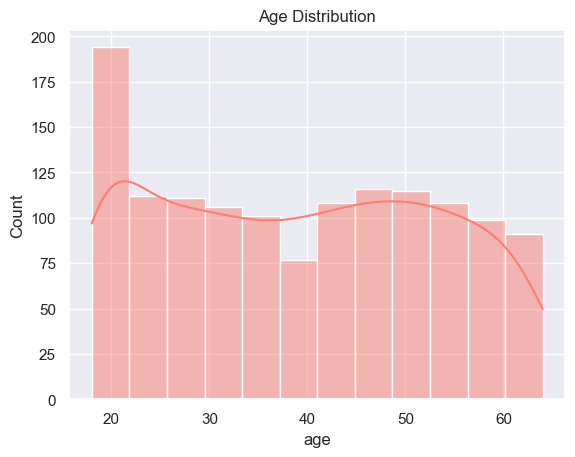

In [154]:
#Seaborn visualization
sns.histplot(h_data['age'], kde=True, color='salmon').set(title = 'Age Distribution')
plt.show()

In [11]:
#Check use .describe() to see the range of values of the bmi column
h_data["bmi"].describe()
#From national institutes of health https://www.nhlbi.nih.gov/health/educational/lose_wt/BMI/bmi_tbl.pdf
#"Normal" is 19-24, "Overweight" is 25-29, "Obese" is 30-39, "Extreme Obesity" is 40+


count    1338.000000
mean       30.663397
std         6.098187
min        15.960000
25%        26.296250
50%        30.400000
75%        34.693750
max        53.130000
Name: bmi, dtype: float64

In [12]:
#Visual for the BMI distribution
bmi_chart = px.histogram(h_data, x = 'bmi', title = 'Distribution of BMI (Body Mass Index)', color_discrete_sequence= ["purple"])
bmi_chart.update_layout(bargap=0.1)
bmi_chart.show()

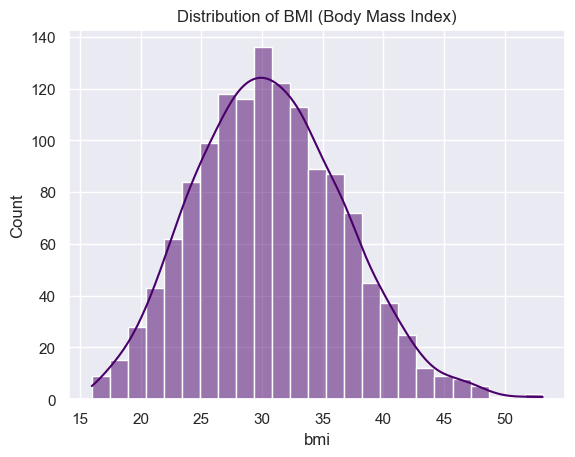

In [151]:
#Visual for the BMI distribution
sns.histplot(h_data['bmi'], kde=True, color='#49006a').set(title= 'Distribution of BMI (Body Mass Index)')
plt.show()

In [13]:
#Explore the number of kids column
h_data["children"].value_counts()

0    574
1    324
2    240
3    157
4     25
5     18
Name: children, dtype: int64

In [14]:
#Show the number of children column visually
no_of_children = px.histogram(h_data, x='children', color_discrete_sequence=["green"], title = "Distribution of Number of Children")
no_of_children.update_layout(bargap=0.1)
no_of_children.show()

In [15]:
#Explore the 'regions' column of the dataset
h_data["region"].value_counts()

southeast    364
southwest    325
northwest    325
northeast    324
Name: region, dtype: int64

In [16]:
#Show the distribution of customers by region visually
regions = px.histogram(h_data, x="region", color_discrete_sequence=['orange'], title = 'Distribution of Customers by Region')
regions.update_layout(bargap=0.1)
regions.show()

In [21]:
#This visual could also be a pie chart
pie_regions = h_data["region"].value_counts()
regions = pie_regions.index
population = pie_regions.values
pie = px.pie(h_data, values=population, names=regions, title = "Percentage of Customers by Region")
pie.show()

In [17]:
#Explore the 'charges' column (this is the column we are thinking about using as the target variable)
h_data["charges"].describe()

count     1338.000000
mean     13270.422265
std      12110.011237
min       1121.873900
25%       4740.287150
50%       9382.033000
75%      16639.912515
max      63770.428010
Name: charges, dtype: float64

In [18]:
#Visualize the 'charges' column
charges = px.histogram(h_data, x='charges', color_discrete_sequence=['gray'], title = 'Distribution of Charges (in Dollars)')
charges.update_layout(bargap=0.1)
charges.show()

In [157]:
#Load original file to use for visualization fine tuning c
visualization_df = pd.read_csv("Resource/Health_insurance.csv")

#View DataFrame
visualization_df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


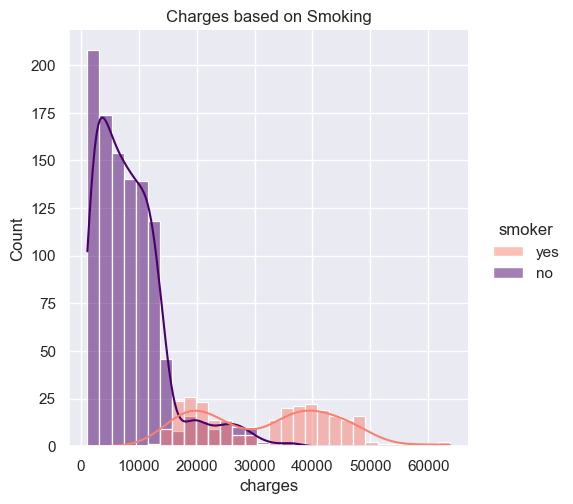

In [159]:
palette = ["salmon", '#49006a']
sns.set()
sns.displot(visualization_df, x='charges', hue='smoker',kde=True, palette=palette).set(title= 'Charges based on Smoking')
plt.show()

In [22]:
#Look at the correlations between the features of the dataset
print(h_data.corr())

               age       bmi  children   charges
age       1.000000  0.109272  0.042469  0.299008
bmi       0.109272  1.000000  0.012759  0.198341
children  0.042469  0.012759  1.000000  0.067998
charges   0.299008  0.198341  0.067998  1.000000


Text(0.5, 1.0, 'Correlation Matrix')

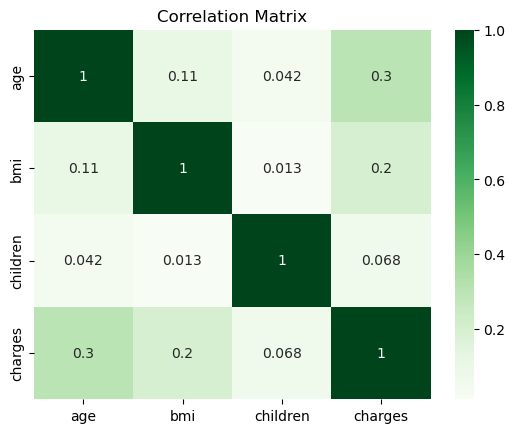

In [29]:
#Visualize correlations with Heatmap
sns.heatmap(h_data.corr(), cmap='Greens', annot=True)
plt.title('Correlation Matrix')

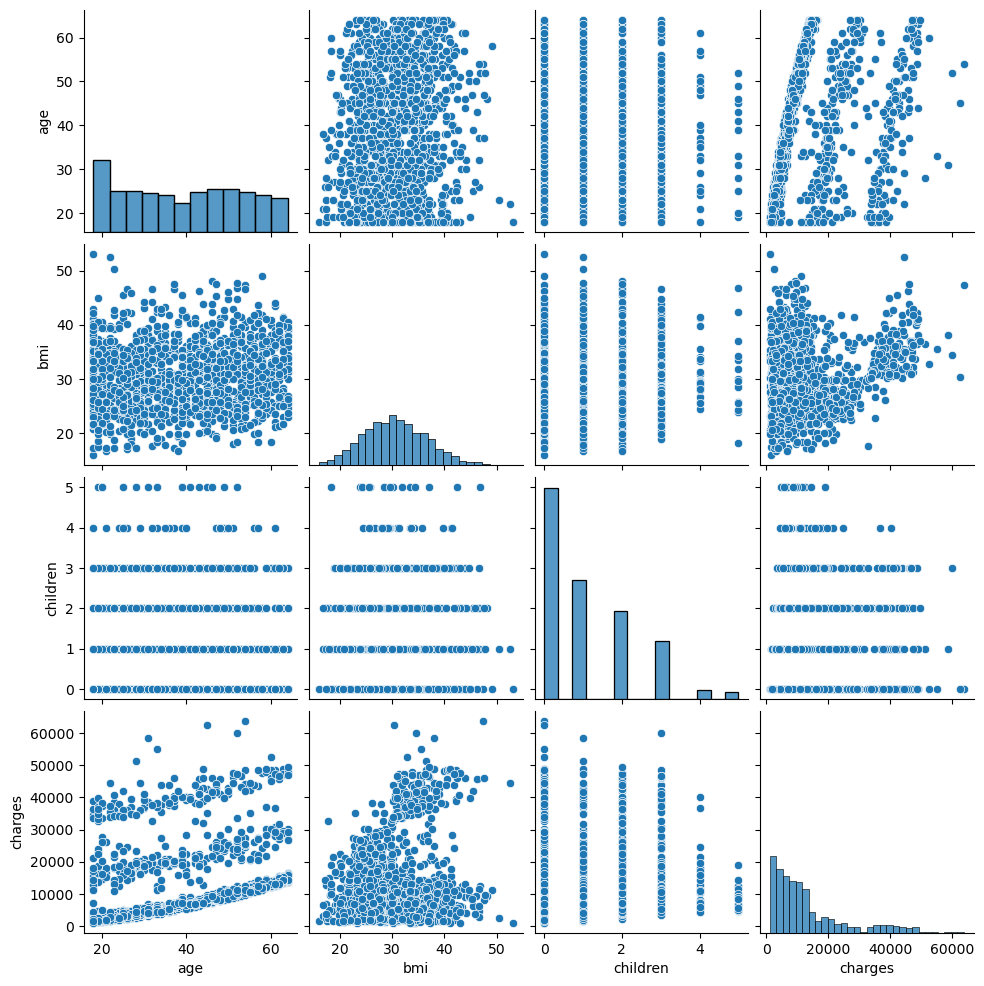

In [110]:
numeric_features = ['age', 'bmi', 'children', 'charges']
sns.pairplot(h_data[numeric_features])
plt.show()

In [31]:
#Change the 'male' and 'female' to numerical data in the 'sex' column 
h_data['sex'] = h_data['sex'].map({'female': 0, 'male': 1})

#Change the 'yes' and 'no' values to numerical data in the 'smoker' column
h_data['smoker'] = h_data['smoker'].map({'no': 0, 'yes': 1})

print(h_data.head())

   age  sex     bmi  children  smoker     region      charges
0   19    0  27.900         0       1  southwest  16884.92400
1   18    1  33.770         1       0  southeast   1725.55230
2   28    1  33.000         3       0  southeast   4449.46200
3   33    1  22.705         0       0  northwest  21984.47061
4   32    1  28.880         0       0  northwest   3866.85520


In [32]:
#Look at the correlation between the features of the dataset
print(h_data.corr())

               age       sex       bmi  children    smoker   charges
age       1.000000 -0.020856  0.109272  0.042469 -0.025019  0.299008
sex      -0.020856  1.000000  0.046371  0.017163  0.076185  0.057292
bmi       0.109272  0.046371  1.000000  0.012759  0.003750  0.198341
children  0.042469  0.017163  0.012759  1.000000  0.007673  0.067998
smoker   -0.025019  0.076185  0.003750  0.007673  1.000000  0.787251
charges   0.299008  0.057292  0.198341  0.067998  0.787251  1.000000


Text(0.5, 1.0, 'Correlation Matrix')

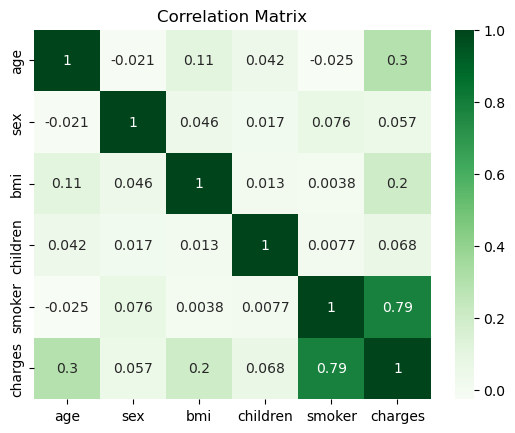

In [33]:
#Visualize correlations with Heatmap
sns.heatmap(h_data.corr(), cmap='Greens', annot=True)
plt.title('Correlation Matrix')

In [34]:
#Change the 'southwest', 'southeast', 'northwest' and 'northeast' values to numerical data in the 'region' column
h_data['region'] = h_data['region'].map({'southeast': 0, 'southwest': 1, 'northeast': 2, 'northwest': 3})

print(h_data.head())

   age  sex     bmi  children  smoker  region      charges
0   19    0  27.900         0       1       1  16884.92400
1   18    1  33.770         1       0       0   1725.55230
2   28    1  33.000         3       0       0   4449.46200
3   33    1  22.705         0       0       3  21984.47061
4   32    1  28.880         0       0       3   3866.85520


Text(0.5, 1.0, 'Correlation Matrix')

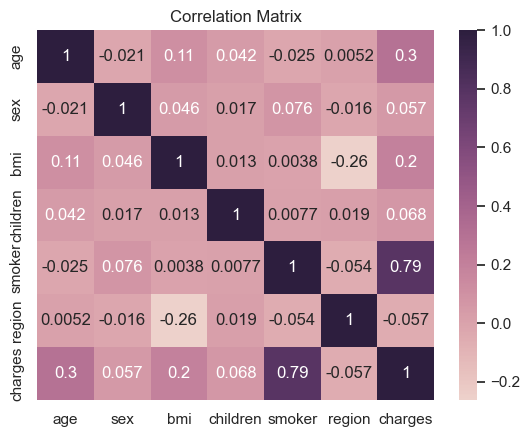

In [193]:
#Visualize correlations with Heatmap
sns.heatmap(h_data.corr(), annot=True, cmap=sns.cubehelix_palette(as_cmap=True))
plt.title("Correlation Matrix")

array([[<AxesSubplot:xlabel='age', ylabel='age'>,
        <AxesSubplot:xlabel='bmi', ylabel='age'>,
        <AxesSubplot:xlabel='charges', ylabel='age'>],
       [<AxesSubplot:xlabel='age', ylabel='bmi'>,
        <AxesSubplot:xlabel='bmi', ylabel='bmi'>,
        <AxesSubplot:xlabel='charges', ylabel='bmi'>],
       [<AxesSubplot:xlabel='age', ylabel='charges'>,
        <AxesSubplot:xlabel='bmi', ylabel='charges'>,
        <AxesSubplot:xlabel='charges', ylabel='charges'>]], dtype=object)

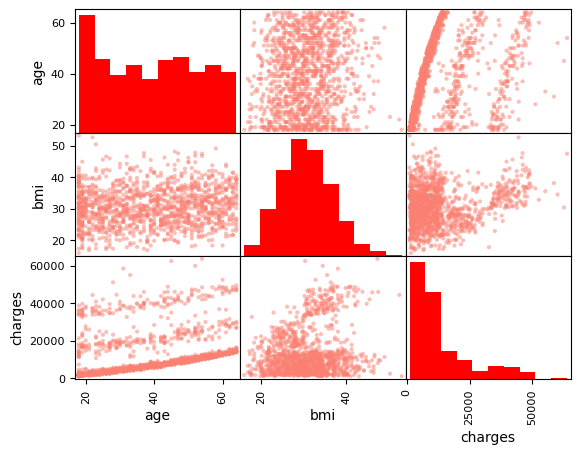

In [93]:
#Create a scatter matrix
features = ['age', 'bmi', 'charges']
pd.plotting.scatter_matrix(h_data[features], color = 'salmon', hist_kwds={'color': 'red'})

In [47]:
#Split data into training and test sets
X = np.array(h_data[["age", "sex", "bmi", "smoker"]])
y = np.array(h_data["charges"])
X=pd.DataFrame(X)
#Split data using train_test_split
#Assign a random_state of 42
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [48]:
#Try Random Forest Regression Algorithm
forest = RandomForestRegressor(n_estimators=100, random_state=0)
forest.fit(X_train, y_train)

RandomForestRegressor(random_state=0)

In [49]:
ypred = forest.predict(X_test)
data = pd.DataFrame(data={'Predicted Premium Amount': ypred})
print(data.head())

   Predicted Premium Amount
0              11800.457662
1               5742.620136
2              28208.465556
3               9623.491969
4              34810.259762


In [50]:
forest.feature_importances_

array([0.13687429, 0.00772695, 0.24412931, 0.61126946])

In [51]:
tester = forest.feature_importances_
#Sort features by their importance
sorted(zip(forest.feature_importances_, X.columns), reverse=True)

[(0.6112694561816557, 3),
 (0.2441293074413613, 2),
 (0.13687429054418337, 0),
 (0.00772694583279967, 1)]

In [53]:
#Trying the random forest with all columns with all columns to create another visual that shows columns that should be dropped
#Define features set
X2 = h_data.copy()
X2.drop("charges", axis=1, inplace=True)
X2.head()

,age,sex,bmi,children,smoker,region
0,19,0,27.900,0,1,1
1,18,1,33.770,1,0,0
2,28,1,33.000,3,0,0
3,33,1,22.705,0,0,3
4,32,1,28.880,0,0,3


In [54]:
#Define target vector
y2 = h_data["charges"].ravel()
y2[:5]

array([16884.924  ,  1725.5523 ,  4449.462  , 21984.47061,  3866.8552 ])

In [55]:
#Splitting into Train and Test sets
X2_train, X2_test, y2_train, y2_test = train_test_split(X2, y2, random_state=42)

In [119]:
print(X2_train.shape)
print(X2_test.shape)

(1003, 6)
(335, 6)


In [120]:
print(h_data.var())

age         1.974014e+02
sex         2.501596e-01
bmi         3.718788e+01
children    1.453213e+00
smoker      1.629689e-01
region      1.278907e+00
charges     1.466524e+08
dtype: float64


In [127]:
from sklearn.preprocessing import StandardScaler
#Creating StandardScaler instance
st_X = StandardScaler()
st_Y = StandardScaler()

In [128]:
#Fitting Standard Scaler
X2_train = st_X.fit_transform(X2_train)
X2_test = st_X.transform(X2_test)

In [129]:
#Fitting Standard Scaler

y2_train = st_Y.fit_transform(y2_train.reshape(-1,1))
y2_test = st_Y.transform(y2_test.reshape(-1, 1))

In [130]:
#Create a random forest regressor

rf_model = RandomForestRegressor(n_estimators = 500, random_state=78)


In [131]:
#Fitting the model

rf_model = rf_model.fit(X2_train, y2_train)

C:\Users\Martha\AppData\Local\Temp\ipykernel_15596\3571896042.py:3: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().



In [132]:
#Making predictions using the testing data
predictions = rf_model.predict(X2_test)

In [133]:
#Calculate feature importance
importances = rf_model.feature_importances_
#Sort features by their importance
sorted(zip(rf_model.feature_importances_, X2.columns), reverse=True)

[(0.6123507667660352, 'smoker'),
 (0.2102066053513182, 'bmi'),
 (0.13711742688278328, 'age'),
 (0.020059680900939805, 'children'),
 (0.013803604077898166, 'region'),
 (0.006461916021025364, 'sex')]

<AxesSubplot:title={'center':'Feature Importances'}, ylabel='1'>

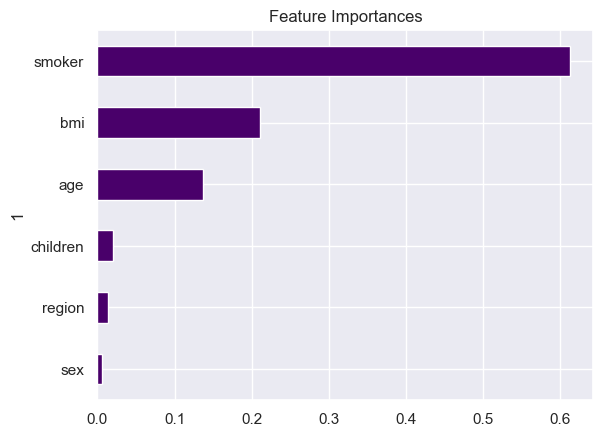

In [194]:
#Visualize the feature by importance
importances_df = pd.DataFrame(sorted(zip(rf_model.feature_importances_, X2.columns), reverse=True))
importances_df.set_index(importances_df[1], inplace=True)
importances_df.drop(columns=1, inplace=True)
importances_df.rename(columns={0: 'Feature Importances'}, inplace=True)
importances_sorted = importances_df.sort_values(by='Feature Importances')
importances_sorted.plot(kind='barh', color='#49006a', title= 'Feature Importances', legend=False)

In [136]:

#Import relevant metrics from scikit-learn
from sklearn.metrics import mean_squared_error, r2_score

#Compute metrics
r2 = r2_score(y2_test, predictions)
mse = mean_squared_error(y2_test, predictions)
rmse = np.sqrt(mse)
std = np.std(y2_test)

# Print releveant metrics.
print(f"The r2 is {r2}.")
print(f"The mean squared error is {mse}.")
print(f"The root mean squared error is {rmse}.")
print(f"The standard deviation is {std}.")

The r2 is -0.5165060547952667.
The mean squared error is 1.5771363007144221.
The root mean squared error is 1.2558408739623115.
The standard deviation is 1.0197942047997546.


In [137]:
#Compare actual with predicted values
compare = pd.DataFrame({"Actual": y2_test[:,0], "Predicted": predictions.reshape(-1,1)[:,0]})
compare.head()

,Actual,Predicted
0,-0.346430,1.090675
1,-0.663805,0.403582
2,1.333548,2.948343
3,-0.329259,1.090675
4,1.700437,2.948343


In [95]:
#Trying the random forest with all columns with all columns to create another visual that shows columns that should be dropped
#Define features set
X3 = h_data.copy()
X3.drop(["charges", 'children', 'region', 'sex'], axis=1, inplace=True)
X3.head()

,age,bmi,smoker
0,19,27.900,1
1,18,33.770,0
2,28,33.000,0
3,33,22.705,0
4,32,28.880,0


In [96]:
#Define target vector
y3 = h_data["charges"].ravel()
y3[:5]

array([16884.924  ,  1725.5523 ,  4449.462  , 21984.47061,  3866.8552 ])

In [97]:
#Splitting into Train and Test sets
X3_train, X3_test, y3_train, y3_test = train_test_split(X3, y3, random_state=42)

In [98]:
#Creating StandardScaler instance
scaler2 = StandardScaler()

In [99]:
#Fitting Standard Scaler
X3_scaler = scaler2.fit(X3_train)

In [100]:
#Scaling data
X3_train_scaled = X3_scaler.transform(X3_train)

X3_test_scaled = X3_scaler.transform(X3_test)

In [101]:
#Create a random forest regressor

rf_model2 = RandomForestRegressor(n_estimators = 500, random_state=78)

In [102]:
#Fitting the model

rf_model2 = rf_model2.fit(X3_train_scaled, y3_train)

In [103]:
#Making predictions using the testing data
new_predictions = rf_model2.predict(X3_test_scaled)

In [104]:
#Calculate feature importance
new_importances = rf_model2.feature_importances_
#Sort features by their importance
sorted(zip(rf_model2.feature_importances_, X3.columns), reverse=True)

[(0.613289472698169, 'smoker'),
 (0.24621207530944836, 'bmi'),
 (0.1404984519923827, 'age')]

<AxesSubplot:title={'center':'Feature Importances'}, ylabel='1'>

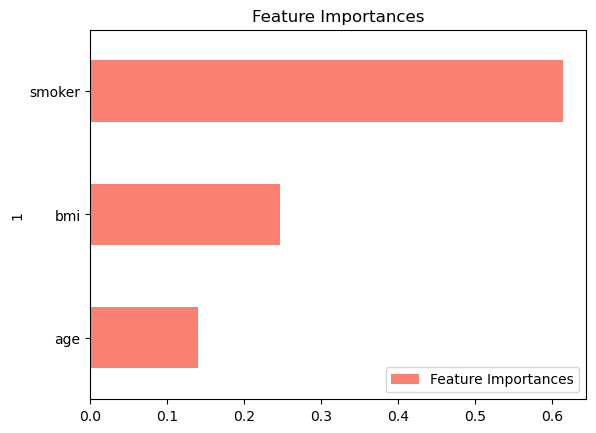

In [106]:
#Visualize the feature by importance
new_importances_df = pd.DataFrame(sorted(zip(rf_model2.feature_importances_, X3.columns), reverse=True))
new_importances_df.set_index(new_importances_df[1], inplace=True)
new_importances_df.drop(columns=1, inplace=True)
new_importances_df.rename(columns={0: 'Feature Importances'}, inplace=True)
new_importances_sorted = new_importances_df.sort_values(by='Feature Importances')
new_importances_sorted.plot(kind='barh', color='salmon', title= 'Feature Importances')